In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

import numpy as np

import h5py
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.insert(0, '../../subroutines')
from isospectrum import isospectrum

In [2]:
Ro = 0.032
randseed = 2

dgname = 'EadyQGPl_dg_%.3f_%d/EadyQGPl_dg_%.3f_%d_s%i' %(Ro, randseed, Ro, randseed, 1)
dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'

with h5py.File(dgname, mode='r') as file:
    avgbt_data = np.squeeze(np.array(file['tasks']['avgbt']))
    avgbb_data = np.squeeze(np.array(file['tasks']['avgbb']))

    avgdivbt_data = np.squeeze(np.array(file['tasks']['avgdivbt']))
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-10:-1])

[199.00033281 199.09997698 199.1996814  199.29996066 199.4007572
 199.49963594 199.60030563 199.70066643 199.79967911]


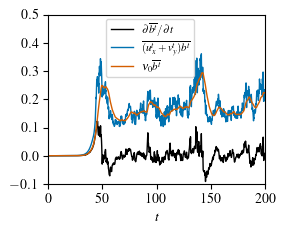

In [3]:
fig=plt.figure(figsize=(2.8, 2.2))

plt.plot(dg_time_ary[1:], (avgbt_data[1:]-avgbt_data[0:-1])/0.1,'k',label="$\partial\overline{b^t}/\partial t$")
plt.plot(dg_time_ary,avgdivbt_data,label="$\overline{(u^t_x+v^t_y)b^{t}}$")
plt.plot(dg_time_ary,0.34*avgbt_data,label="$\\nu_0 \overline{b^t}$")

plt.xlabel("$t$")
plt.ylim(-0.1,0.5)
plt.xlim(0,200)
plt.legend(ncol=1, loc='best', bbox_to_anchor=(0.7,0.6))

figname = 'figs/EadyQGpl_btend_Ro%.2f' %(Ro)
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

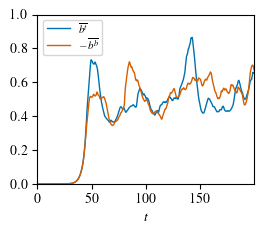

In [4]:
fig=plt.figure(figsize=(2.8, 2.2))

plt.plot(dg_time_ary, avgbt_data, label="$\overline{b^t}$")
plt.plot(dg_time_ary,-avgbb_data, label="$-\overline{b^b}$")
plt.xlabel("$t$")
plt.ylim(0,1.0)
plt.legend()

figname = 'figs/EadyQGpl_bmean_Ro%.2f' %(Ro)
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

### 